Nombre y correo electrónico de mi líder: Xochitl Lyvier Morales Rodríguez
xmorales@itesm.mx

# Introducción

Existen diversos algoritmos de Machine Learning y Deep Learning utilizados para la clasificación de datos. El propósito de utilizar estos algoritmos es obtener nuevo conocimiento, en base a un conjunto de datos. El nuevo conocimiento, en este contexto, se refiere a la asignación de una misma categoría a conjuntos de datos con características similares.

En el primer parcial, se utilizó el algoritmo de K-means para obtener grupos de datos basados en los atributos numéricos nps y puntaje sentimiento. Para este parcial, se hicieron pruebas de varios algoritmos para analizar los atributos categóricos.

# Problema o problemas a resolver

El principal problema que se tuvo en el parcial pasado con el algoritmo de K-means, fue que a pesar de que si se obtuvieron grupos de registros similares hasta cierto grado, realmente no se pudo encontrar una relación entre estos registros. Es por esto que para este parcial se le dio un mayor enfoque al análisis de los atributos categóricos de las columnas.

# ¿Cómo se está resolviendo? 

Se hicieron pruebas con los algoritmos de 1R, Naive Bayes, CART y con una red neuronal para encontrar razones o motivos de que el nps sea mayor o menor a 75.

# Resultados obtenidos hasta el momento:

# 1R Algorithm (Development)

El propósito de utilizar este algoritmo es encontrar el atributo que es el determinante para que la clase sea mayor o menor a 75. 

Se utilizó una tabla de datos para probar el algoritmo, una vez que se compruebe que el algoritmo es confiable, se utilizará con los datos de las ECOAS.

In [ ]:
test = pd.read_excel (r'Test.xlsx')
print(test)

Se verifica el tipo de columna. Si esta es booleana o categórica, no se modifica. Si la columna tiene datos numéricos, se convierte a string. Estas líneas de código están pensadas para utilizarse en la tabla de datos de los ECOAS

In [ ]:
#converting the types of the columns to strings and booleans

for col in test.columns:
    if(test[col].dtype == np.object or test[col].dtype == np.bool):
          pass
    else:
          test[col] = test[col].astype(str)
print(test.dtypes)

Se importó el módulo fractions. El propósito de esto es obtener fracciones con las probabilidades de que el valor del atributo sea verdadero o falso. Sin embargo, se encontró con un obstáculo, ya que no se encontró la forma de contabilizar los valores de valores únicos en cada columna. Tiempo después se encontró, pero el código está escrito para un array, no un dataframe que es lo que se está utilizando. Se está escribiendo la función para que acepte dataframes.

In [ ]:
from fractions import Fraction

#print(test['Outlook'])
a = test['Outlook'].value_counts()
target = test['Play'].value_counts()
#length_target = target.size
#length = a.size
x = 0
gkk = test.groupby(['Outlook'])
print(gkk)


"""while x < length:
    numerator = a.iloc[x]
    print(a.iloc[x])
    
    x = x+1 
"""
#if a(sunny) > a.iloc[:2]:
 
    #print(a[:0])
#else:
 #   pass
#print(a)

Actualmente, este algoritmo se encuentra en stand-by hasta que se termine de escribir la función previamente mencionada.

# Naïve Bayes Algorithm (Development)

Con este algoritmo, se busca obtener las probabilidades de que la clase sea mayor o menor a 75, en base a los datos obtenidos en las ECOAS. Posteriormente se planea obtener una predicción en base a un query.

Inicialmente se planeaba utilizar los módulos de Naive Bayes que vienen en la librería de sklearn; para esto, se siguió el siguiente ejemplo:
https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

No obstante, se encontró que esta librería requiere como input datos numéricos, por lo que no se pueden usar las variables categóricas.

In [ ]:
df = pd.read_table('SMSSpamCollection',
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [ ]:
df['label'] = df.label.map({'ham': 0, 'spam': 1})

In [ ]:
df['message'] = df.message.map(lambda x: x.lower())
df['message'] = df.message.str.replace('[^\w\s]', '')b

In [ ]:
import nltk
nltk.download()

In [ ]:
df['message'] = df['message'].apply(nltk.word_tokenize)

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
df['message'] = df['message'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=69)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
print(model)
print(counts)

Se puede implementar el algoritmo para que pueda contar los valores categóricos y así obtener las probabilidades. No obstante, se necesita de una función que cuente la cantidad de valores, igual a la del algoritmo 1R. Por lo tanto, también este algoritmo se encuentra en stand-by.

# Classification and Regression tree (CART) Algorithm

Se utilizó el algoritmo CART, tomado de este repositorio: https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

Este algoritmo es similar al C4.5. La principal diferencia radica en que este algoritmo mide la ganancia de información utilizando la impureza de Gini en lugar de la entropía.

Se utilizó el dataset de test y se obtuvo un árbol de decisión. Una vez que se revisó este árbol, se implementó este algoritmo para los datos obtenidos de las encuestas. Sin embargo, a la hora de correr el código, este no es capaz de producir un árbol (se corre el algoritmo, este continúa corriendo por un largo tiempo, más de 15 minutos, y no es capaz de proveer un árbol). Se cree que si se reduce la tabla o si se divide en segmentos, es posible que si se pueda obtener un árbol.

In [ ]:
#Testing with sample dataset
import decision_tree as dt
dec_tree = test.values #converting the dataframe into an array
my_tree = dt.build_tree(dec_tree)
dt.print_tree(my_tree)

In [ ]:
nps75 = pd.read_excel (r'nps75.xlsx')

for col in nps75:
    nps75[col] = [np.nan if (not isinstance(val, str) and np.isnan(val)) else 
               (val if isinstance(val, str) else str(int(val))) 
               for val in nps75[col].tolist()]

print(nps75.dtypes)

Para la implementación del algoritmo con los datos de las ECOAS, primero se convirtió los datos a un array para que puedan ser utilizados por las funciones.

In [ ]:
#Using the dataframe
import decision_tree as dt
dec_tree = nps75.values #converting the dataframe into an array
my_tree = dt.build_tree(dec_tree)
dt.print_tree(my_tree)

# Neural Nertwork

Se usaron las siguientes librerías:

In [1]:
#By José Francisco Pacheco Quintana a.k.a. 'pach'
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Se construye un dataset en base a un archivo de datos al que previamente ya se había hecho análisis

In [2]:
dataset = pd.read_excel (r'commentsData.xlsx')

Nos muestra las dimensiones y la estructura general del dataset

In [3]:
dataset.head(2)

,id,tipo,campus,id_programa,nps,programa,id_externo_programa,id_modulo,modulo,instructor,...,fecha_inicio_modulo,fecha_fin_modulo,indicador,codigo_indicador,comentario,puntaje_sentimiento,sentimiento,categoria,subcategoria,grupo
0,1,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"Que su curso lo haga mas dinámico, tiene una v...",-0.12,Negativo,Instructor,Dinamismo y Ejercicios,4
1,2,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"El instructuor es muy bueno, conoce muy bien l...",0.46,Positivo,Instructor,Habilidad de Enseñanza,4


Se borran estas columnas, ya que se  consideran innecesarias para la red neuronal, esto es ya que resultan repetitivas con otras columnas.

In [4]:
dataset = dataset.drop(['id', 'comentario', 'correo_coordinador', 'correo_instructor', 'id_externo_programa', 'id_modulo', 'correo_instructor', 'fecha_instructor', 'correo_coordinador', 'fecha_coordinador', 'codigo_indicador', 'comentario', 'grupo', 'fecha_inicio_modulo', 'fecha_fin_modulo'], axis = 1)

Se guarda el dataset en un archivo para futuros análisis

In [5]:
from pandas import ExcelWriter
writer = ExcelWriter('dataset.xlsx')
dataset.to_excel(writer,'Sheet1')
writer.save()

Se declara la variable df, la cual consiste en un dataset sin los valores numéricos en las conferencias. Luego se borran las filas que contienen algún NaN

In [7]:
df = pd.read_excel(r'dataset.xlsx')
df = df.dropna()

Antes de realizar cualquier análisis con el dataset, se tienen que discretizar todas las columnas categóricas. La primera fue las de "nps75", ya que esta es necesaria para obtener la clase para el análisis; primero se crea una variable booleana que es true cuando el nps del registro es mayor o igual a 75 y false cuando es menor. Luego de obtener esta columna, ésta es borrada del dataset.

In [8]:
df['nps75'] = (df['nps'] >= 75)
df = df.drop(['nps'], axis = 1)

Se convierte de booleano a una variable nuḿerica que tiene valores de 1 o 0

In [9]:
df['nps75'] = df['nps75'].astype(int)

Se crea la función get_campus, la cual regresa un dataframe conformado con las filas sobre un campus en específico, además de borrar la columna 'campus'

In [10]:
def get_campus(data, campus):
    data_campus = data.loc[dataset['campus'] == campus]
    data_campus = data_campus.drop(['campus'], axis = 1)
    return data_campus

Para efectos de ejemplo, se utilizó el campus Aguascalientes.

In [11]:
ags = get_campus(df, 'AGS (Aguascalientes)')

Se define la función conv_string, la cual convierte la columna 'id_programa' a string

In [12]:
def conv_string(df):
    df['id_programa'] = df['id_programa'].astype(str)
    return df

Se define la funcion cat_to_num, la cual llama a la función conv_string e introduce un dataframe a esta. Luego se codifican de forma binaria las columnas categóricas para que sean numéricas. Esto causa que se genere una columna nueva para cada diferente valor categórico que exista en las columnas.

In [15]:
def cat_to_num(df):
    conv_string(df)
    num = pd.get_dummies(df)
    num1 = num.pop('nps75')
    num['nps75'] = num1
    return num

Se grafica la correlación entre variables, no es muy claro, debido a que en el proceso de decodificación de las variables categóricas, se obtuvieron columnas con pocos 1's y muchos 0's. Sin embargo, se puede ver que hay algunas variables que si muestran cierto grado de correlación (los puntos negros)

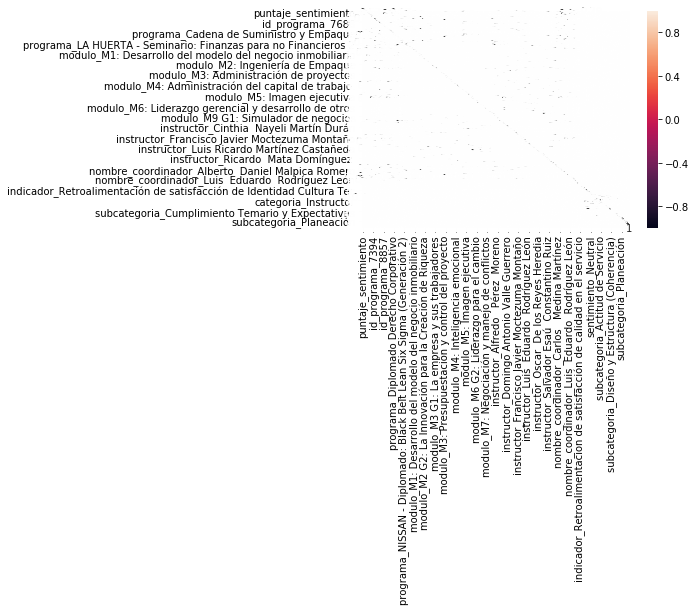

In [17]:
sns.heatmap(d.corr(), annot=True)

Se crean los dataframes 'X' y 'y', x corresponde a las variables independientes, es decir, nuestro input; y corresponde a la variable dependiente, la clase

In [23]:
X= d.iloc[:,0:len(d.columns)-1]
y= d.iloc[:,len(d.columns)-1]

Se importa la función StandardScaler del módulo preprocessing, se introducen las variables independientes a esta función

In [24]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.66776095, -1.25380776,  1.25380776, ..., -0.18930446,
        -0.15081916, -0.02871241],
       [ 0.84022751, -1.25380776,  1.25380776, ..., -0.18930446,
        -0.15081916, -0.02871241],
       [-0.71197149, -1.25380776,  1.25380776, ..., -0.18930446,
        -0.15081916, -0.02871241],
       ...,
       [ 1.01269406,  0.79757043, -0.79757043, ..., -0.18930446,
        -0.15081916, -0.02871241],
       [ 0.77124088,  0.79757043, -0.79757043, ..., -0.18930446,
        -0.15081916, -0.02871241],
       [-0.19457182,  0.79757043, -0.79757043, ..., -0.18930446,
        -0.15081916, -0.02871241]])

Se emplea la función train_test_split para dividir los dataframes 'X' y 'y' en 4 dataframes, dos para entrenamiento y dos para testing

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

De la librería keras, se importan el módulo Sequential y de layers, se importa la función Dense

In [26]:
from keras import Sequential
from keras.layers import Dense

/home/pach/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Se crearon 25 capas para el análisis de los datos. Realmente no existe un método en específico para determinar cuántas capaz y neuronas se deben de utilizar en una red neuronal. De acuerdo a [1], uno de los métodos que se puede utilizar es experimentación. No obstante, a fin de que el proceso no sea tan arbitrario y basado en [2], que es el sitio que se utilizó como referencia para la elaboración de este modelo, se obtuvo el número de neuronas como función de parte entera del logaritmo base dos del número total de columnas de input más 1. El número de capas, sin contar la capa de salida, se calculó como el número total de columnas sobre el número de neuronas por capa, obteniendo como total 25. Para inicializar la capa de salida, se utilizó la función sigmoide.

[1]: https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
[2]: https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1

In [27]:
#Besides the input and the output layers, we will use 25 layers for the analysis
classifier = Sequential()
#Hidden Layer 1 <-input
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=206))
#Hidden Layer 2
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 3
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 4
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 5
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 6
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 7
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 8
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 9
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 10
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 11
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 12
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 13
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 14
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 15
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 16
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 17
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 18
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 19
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 20
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 21
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 22
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 23
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 24
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Se compila la red neuronal, utilizando la optimización por medio de estimación de momento adaptivo (ADAM)

In [29]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

Se hacen 100 iteraciones

In [30]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=24, epochs=100)

Epoch 1/100
607/607 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.9160
Epoch 2/100
607/607 [==============================] - 0s 122us/step - loss: 0.6660 - accuracy: 0.9555
Epoch 3/100
607/607 [==============================] - 0s 128us/step - loss: 0.6313 - accuracy: 0.9555
Epoch 4/100
607/607 [==============================] - 0s 122us/step - loss: 0.5541 - accuracy: 0.9555
Epoch 5/100
607/607 [==============================] - 0s 103us/step - loss: 0.3746 - accuracy: 0.9555
Epoch 6/100
607/607 [==============================] - 0s 107us/step - loss: 0.1951 - accuracy: 0.9555
Epoch 7/100
607/607 [==============================] - 0s 107us/step - loss: 0.1862 - accuracy: 0.9555
Epoch 8/100
607/607 [==============================] - 0s 106us/step - loss: 0.1829 - accuracy: 0.9555
Epoch 9/100
607/607 [==============================] - 0s 105us/step - loss: 0.1825 - accuracy: 0.9555
Epoch 10/100
607/607 [==============================] - 0s 108us/step - los

Se evalúa el modelo y se obtiene el valor de la pérdida y el porcentaje de precisión del modelo, obteniendo un 95.5% de precisión.

In [33]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

607/607 [==============================] - 0s 34us/step


[0.18193950092871067, 0.9555189609527588]

Se introducen valores de prueba, para evaluar en cuántos de estos se puede predecir acertadamente la clase

In [38]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

Se importa la función confusion_matrix, en la cual se evalúan en cuántas de las instancias introducidas durante la prueba se predijo la clase de forma correcta. Se obtuvo que en todas las clases introducidas, se logro predecir acertadamente

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  40]
 [  0 567]]


<h3>Probando con otro campus</h3>

In [42]:
#Testing with another campus
mty = get_campus(df, 'MTY (Monterrey)')
m = cat_to_num(mty)

In [44]:
X= m.iloc[:,0:755]
y= m.iloc[:,755]

In [45]:
X = sc.fit_transform(X)
X

array([[ 1.12104493, -0.75851544,  0.75851544, ..., -0.02440113,
        -0.23507239, -0.04729132],
       [ 0.43092789, -0.75851544,  0.75851544, ..., -0.02440113,
        -0.23507239, -0.04729132],
       [ 0.32741033, -0.75851544,  0.75851544, ..., -0.02440113,
        -0.23507239, -0.04729132],
       ...,
       [ 0.12037522, -0.75851544,  0.75851544, ..., -0.02440113,
        -0.23507239, -0.04729132],
       [ 1.4315976 , -0.75851544,  0.75851544, ..., -0.02440113,
        -0.23507239, -0.04729132],
       [ 0.39642204, -0.75851544,  0.75851544, ..., -0.02440113,
        -0.23507239, -0.04729132]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
#Besides the input and the output layers, we will use 25 layers for the analysis
classifier = Sequential()
#Hidden Layer 1
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=755))
#Hidden Layer 2
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 3
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 4
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 5
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 6
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 7
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 8
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 9
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 10
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 11
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 12
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 13
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 14
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 15
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 16
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 17
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 18
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 19
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 20
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 21
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 22
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 23
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 24
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Hidden Layer 25
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [48]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [49]:
classifier.fit(X_train,y_train, batch_size=50, epochs=100)

Epoch 1/100
4705/4705 [==============================] - 1s 192us/step - loss: 0.6745 - accuracy: 0.7819
Epoch 2/100
4705/4705 [==============================] - 0s 51us/step - loss: 0.5763 - accuracy: 0.7875
Epoch 3/100
4705/4705 [==============================] - 0s 50us/step - loss: 0.5174 - accuracy: 0.7875
Epoch 4/100
4705/4705 [==============================] - 0s 53us/step - loss: 0.5182 - accuracy: 0.7875
Epoch 5/100
4705/4705 [==============================] - 0s 52us/step - loss: 0.5179 - accuracy: 0.7875
Epoch 6/100
4705/4705 [==============================] - 0s 56us/step - loss: 0.5174 - accuracy: 0.7875
Epoch 7/100
4705/4705 [==============================] - 0s 55us/step - loss: 0.5174 - accuracy: 0.7875
Epoch 8/100
4705/4705 [==============================] - 0s 49us/step - loss: 0.5176 - accuracy: 0.7875
Epoch 9/100
4705/4705 [==============================] - 0s 50us/step - loss: 0.5175 - accuracy: 0.7875
Epoch 10/100
4705/4705 [==============================] - 0s 52

In [52]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

Se logró predecir de forma correcta en todos los registros introducidos

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0  453]
 [   0 1564]]


Se logró predecir de forma acertada todos los valores introducidos en ambas pruebas; sin embargo, esto puede ser indicador de que el modelo presenta overfitting

# ¿Qué se piensa hacer para la entrega final?

Para la entrega final, se planea terminar los algoritmos que están inconclusos y verificar si estos y los que ya están implementados presentan overfitting o no.